In [110]:
import pandas as pd

df= pd.read_csv("global_holidays.csv")
df_1= pd.read_csv("monthly_passengers.csv")

print(df.info())

print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44393 entries, 0 to 44392
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ADM_name  44393 non-null  object
 1   ISO3      44393 non-null  object
 2   Date      44393 non-null  object
 3   Name      44393 non-null  object
 4   Type      44393 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7242 entries, 0 to 7241
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ISO3           7242 non-null   object 
 1   Year           7242 non-null   int64  
 2   Month          7242 non-null   int64  
 3   Total          3955 non-null   float64
 4   Domestic       3292 non-null   float64
 5   International  3847 non-null   float64
 6   Total_OS       6594 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 396.2+ KB
None


In [111]:
# Filtrar global_holidays.csv
df_mex = df[df["ISO3"] == "MEX"]
print("Global Holidays (MEX):")
print(df_mex.head())

# Filtrar monthly_passengers.csv
df1_mex = df_1[df_1["ISO3"] == "MEX"]
print("\nMonthly Passengers (MEX):")
print(df1_mex.info())


Global Holidays (MEX):
      ADM_name ISO3        Date                              Name  \
25418   Mexico  MEX  2010-05-05  Battle of Puebla (Cinco de Mayo)   
25419   Mexico  MEX  2011-05-05  Battle of Puebla (Cinco de Mayo)   
25420   Mexico  MEX  2012-05-05  Battle of Puebla (Cinco de Mayo)   
25421   Mexico  MEX  2013-05-05  Battle of Puebla (Cinco de Mayo)   
25422   Mexico  MEX  2014-05-05  Battle of Puebla (Cinco de Mayo)   

                Type  
25418  Local holiday  
25419  Local holiday  
25420  Local holiday  
25421  Local holiday  
25422  Local holiday  

Monthly Passengers (MEX):
<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 4554 to 4646
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ISO3           93 non-null     object 
 1   Year           93 non-null     int64  
 2   Month          93 non-null     int64  
 3   Total          0 non-null      float64
 4   Domestic       0 non-null 

borrrar las columnas porque son nulas

In [112]:
df1_mex= df1_mex.drop(columns=["Total", "Domestic", "International"])
print(df1_mex.head())


     ISO3  Year  Month  Total_OS
4554  MEX  2010      1  6102.397
4555  MEX  2010      2  5542.941
4556  MEX  2010      3  6741.286
4557  MEX  2010      4  6123.535
4558  MEX  2010      5  6096.881


In [113]:
df1_mex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 4554 to 4646
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ISO3      93 non-null     object 
 1   Year      93 non-null     int64  
 2   Month     93 non-null     int64  
 3   Total_OS  93 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.6+ KB


In [114]:
df1_mex= df1_mex.dropna()
print(df1_mex.info())


<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 4554 to 4646
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ISO3      93 non-null     object 
 1   Year      93 non-null     int64  
 2   Month     93 non-null     int64  
 3   Total_OS  93 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.6+ KB
None


datos de 2010 a 2017-9

In [115]:
# Agrupar por año y contar meses únicos
meses_unicos = df1_mex.groupby("Year")["Month"].nunique()

print(meses_unicos)

Year
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017     9
Name: Month, dtype: int64


In [116]:
import pandas as pd

# --- 1. Leer tus archivos ---
df_cpi = pd.read_csv("CPALTT01MXM659N.csv")
df_fx = pd.read_csv("EXMXUS.csv")
df_unemp = pd.read_csv("LRHUTTTTMXM156N.csv")
df_prod = pd.read_csv("MEXPROMANMISMEI.csv")
df_trade = pd.read_csv("MEXXTNTVA01NCMLM.csv")

# --- 2. Convertir fechas ---
for df in [df_cpi, df_fx, df_unemp, df_prod, df_trade]:
    df["observation_date"] = pd.to_datetime(df["observation_date"])

In [118]:

# --- 3. Filtrar rango 2010-2017 y solo septiembre ---
def filtrar(df, col_value):
    df = df[(df["observation_date"].dt.year >= 2010) &
            (df["observation_date"].dt.year <= 2017) ]
    df = df.rename(columns={df.columns[1]: col_value})  # renombrar serie
    return df[["observation_date", col_value]]

df_cpi = filtrar(df_cpi, "CPI")
df_fx = filtrar(df_fx, "ExchangeRate")
df_unemp = filtrar(df_unemp, "Unemployment")
df_prod = filtrar(df_prod, "Manufacturing")
df_trade = filtrar(df_trade, "TradeBalance")

# --- 4. Unir todo en un solo DataFrame económico ---
df_econ = df_cpi.merge(df_fx, on="observation_date") \
                .merge(df_unemp, on="observation_date") \
                .merge(df_prod, on="observation_date") \
                .merge(df_trade, on="observation_date")

print(df_econ.head())

  observation_date       CPI  ExchangeRate  Unemployment  Manufacturing  \
0       2010-01-01  4.457340       12.8096      5.877218       82.76318   
1       2010-02-01  4.830055       12.9396      5.449079       84.45656   
2       2010-03-01  4.970401       12.5673      4.816464       85.62910   
3       2010-04-01  4.270977       12.2396      5.407558       86.11966   
4       2010-05-01  3.916638       12.7262      5.116016       86.74275   

   TradeBalance  
0 -5.693478e+09  
1  5.466387e+09  
2  4.943175e+09  
3  9.862255e+08  
4  2.197129e+09  


In [122]:
df_econ.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  96 non-null     datetime64[ns]
 1   CPI               96 non-null     float64       
 2   ExchangeRate      96 non-null     float64       
 3   Unemployment      96 non-null     float64       
 4   Manufacturing     96 non-null     float64       
 5   TradeBalance      96 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.6 KB


In [123]:
df1_mex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 4554 to 4646
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ISO3      93 non-null     object 
 1   Year      93 non-null     int64  
 2   Month     93 non-null     int64  
 3   Total_OS  93 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.6+ KB


In [124]:
# Crear columna de fecha en df1_mex
df1_mex["date"] = pd.to_datetime(df1_mex["Year"].astype(str) + "-" + df1_mex["Month"].astype(str) + "-01")

# Unir con las series económicas
df_final = df1_mex.merge(df_econ, left_on="date", right_on="observation_date", how="left")

print(df_final.head())


  ISO3  Year  Month  Total_OS       date observation_date       CPI  \
0  MEX  2010      1  6102.397 2010-01-01       2010-01-01  4.457340   
1  MEX  2010      2  5542.941 2010-02-01       2010-02-01  4.830055   
2  MEX  2010      3  6741.286 2010-03-01       2010-03-01  4.970401   
3  MEX  2010      4  6123.535 2010-04-01       2010-04-01  4.270977   
4  MEX  2010      5  6096.881 2010-05-01       2010-05-01  3.916638   

   ExchangeRate  Unemployment  Manufacturing  TradeBalance  
0       12.8096      5.877218       82.76318 -5.693478e+09  
1       12.9396      5.449079       84.45656  5.466387e+09  
2       12.5673      4.816464       85.62910  4.943175e+09  
3       12.2396      5.407558       86.11966  9.862255e+08  
4       12.7262      5.116016       86.74275  2.197129e+09  


#Visualizaciones

In [129]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ISO3              93 non-null     object        
 1   Year              93 non-null     int64         
 2   Month             93 non-null     int64         
 3   Total_OS          93 non-null     float64       
 4   date              93 non-null     datetime64[ns]
 5   observation_date  93 non-null     datetime64[ns]
 6   CPI               93 non-null     float64       
 7   ExchangeRate      93 non-null     float64       
 8   Unemployment      93 non-null     float64       
 9   Manufacturing     93 non-null     float64       
 10  TradeBalance      93 non-null     float64       
dtypes: datetime64[ns](2), float64(6), int64(2), object(1)
memory usage: 8.1+ KB


In [142]:
holidays= pd.read_csv("global_holidays.csv")
holidays.head()

,ADM_name,ISO3,Date,Name,Type
0,Aruba,ABW,2010-01-01,New Year's Day,Public holiday
1,Aruba,ABW,2010-01-25,Betico Croes' Birthday,Public holiday
2,Aruba,ABW,2010-02-15,Carnival Monday,Public holiday
3,Aruba,ABW,2010-03-18,National Anthem and Flag Day,Public holiday
4,Aruba,ABW,2010-04-02,Good Friday,Public holiday


In [ ]:
holidays_mex = holidays[holidays["ISO3"]=="MEX"].copy()
holidays_mex["Date"] = pd.to_datetime(holidays_mex["Date"])
holidays_mex["Year"] = holidays_mex["Date"].dt.year
holidays_mex["Month"] = holidays_mex["Date"].dt.month


In [144]:
print(holidays_mex.head())
holidays_mex['Type'].value_counts()

      ADM_name ISO3       Date                              Name  \
25418   Mexico  MEX 2010-05-05  Battle of Puebla (Cinco de Mayo)   
25419   Mexico  MEX 2011-05-05  Battle of Puebla (Cinco de Mayo)   
25420   Mexico  MEX 2012-05-05  Battle of Puebla (Cinco de Mayo)   
25421   Mexico  MEX 2013-05-05  Battle of Puebla (Cinco de Mayo)   
25422   Mexico  MEX 2014-05-05  Battle of Puebla (Cinco de Mayo)   

                Type  Year  Month  
25418  Local holiday  2010      5  
25419  Local holiday  2011      5  
25420  Local holiday  2012      5  
25421  Local holiday  2013      5  
25422  Local holiday  2014      5  


,count
Type,
Observance,234
Public holiday,126
Local holiday,10


#Visualizaciones

/tmp/ipython-input-1289936190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=holidays_mex, x="Type", order=holidays_mex["Type"].value_counts().index, palette="Set2")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127485 (\N{REGIONAL INDICATOR SYMBOL LETTER X}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


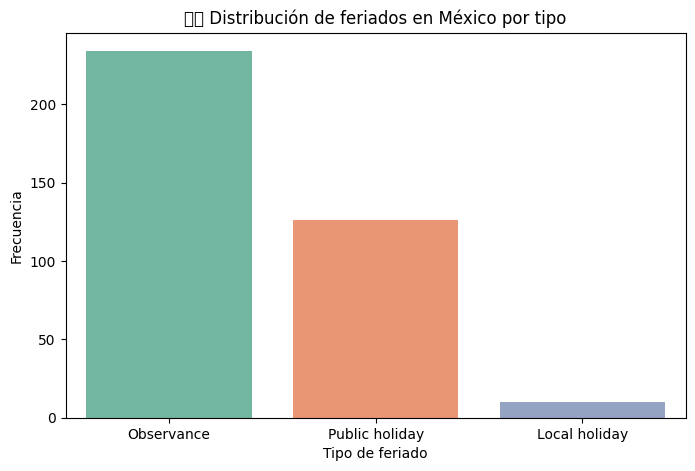

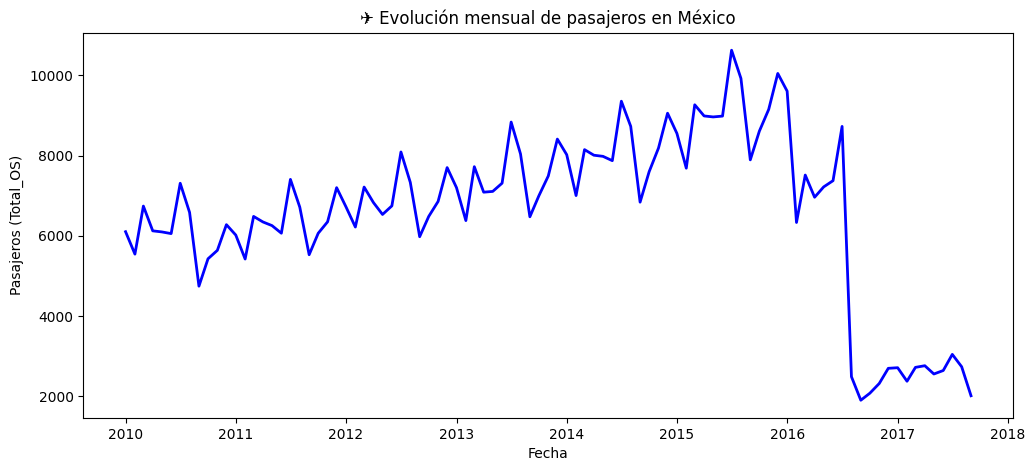

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


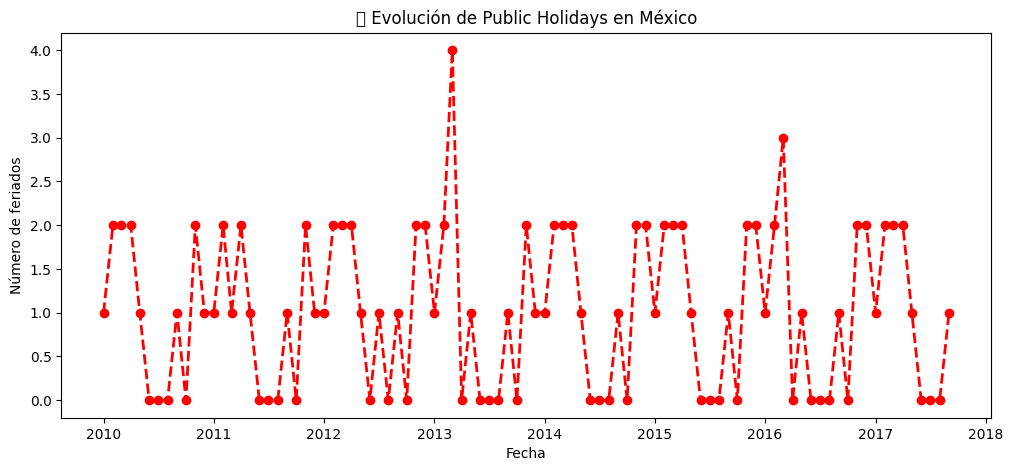

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


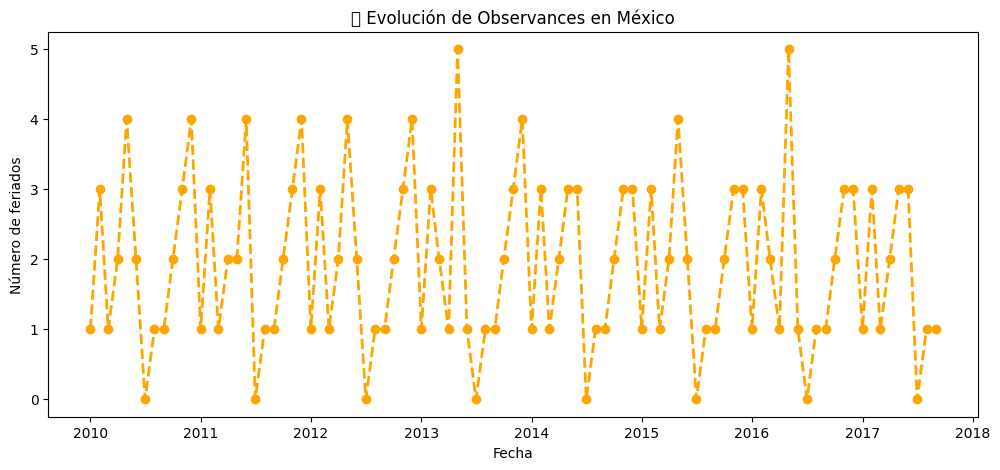

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


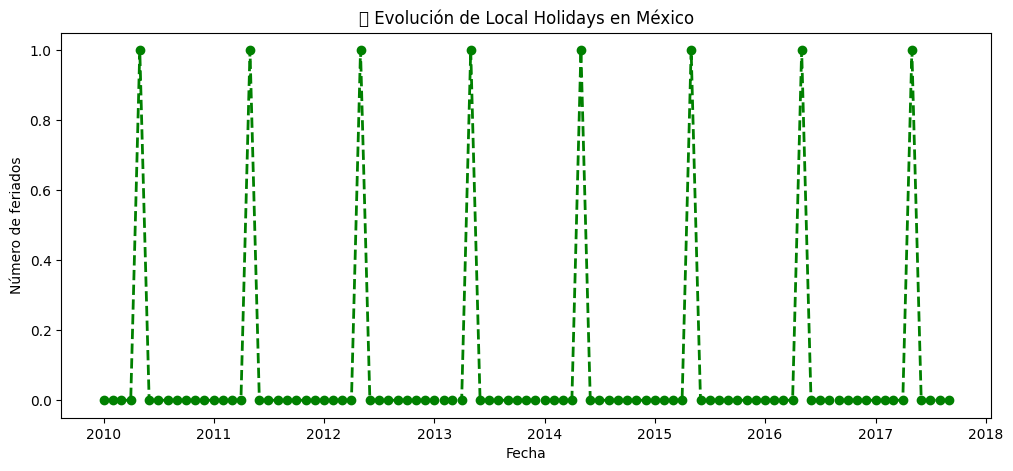

In [150]:
# --- 2. Gráfico de barras: distribución de tipos ---
plt.figure(figsize=(8,5))
sns.countplot(data=holidays_mex, x="Type", order=holidays_mex["Type"].value_counts().index, palette="Set2")
plt.title("🇲🇽 Distribución de feriados en México por tipo")
plt.xlabel("Tipo de feriado")
plt.ylabel("Frecuencia")
plt.show()

# --- 3. Número de feriados por mes y tipo ---
feriados_tipo = holidays_mex.groupby(["Year","Month","Type"]).size().reset_index(name="HolidayCount")

# Pivot para columnas por tipo
feriados_pivot = feriados_tipo.pivot_table(index=["Year","Month"], columns="Type", values="HolidayCount", fill_value=0).reset_index()

# --- 4. Unir con df_final ---
df_final_h = df_final.merge(feriados_pivot, on=["Year","Month"], how="left").fillna(0)
df_final_h["date"] = pd.to_datetime(df_final_h["Year"].astype(str) + "-" + df_final_h["Month"].astype(str) + "-01")

# --- 5. Gráfico separado: pasajeros ---
plt.figure(figsize=(12,5))
plt.plot(df_final_h["date"], df_final_h["Total_OS"], color="blue", linewidth=2)
plt.title("✈️ Evolución mensual de pasajeros en México")
plt.ylabel("Pasajeros (Total_OS)")
plt.xlabel("Fecha")
plt.show()

# --- 6. Gráfico separado: Public holidays ---
plt.figure(figsize=(12,5))
plt.plot(df_final_h["date"], df_final_h["Public holiday"], color="red", linewidth=2, linestyle="--", marker="o")
plt.title("🎉 Evolución de Public Holidays en México")
plt.ylabel("Número de feriados")
plt.xlabel("Fecha")
plt.show()

# --- 7. Gráfico separado: Observances ---
plt.figure(figsize=(12,5))
plt.plot(df_final_h["date"], df_final_h["Observance"], color="orange", linewidth=2, linestyle="--", marker="o")
plt.title("📅 Evolución de Observances en México")
plt.ylabel("Número de feriados")
plt.xlabel("Fecha")
plt.show()

# --- 8. Gráfico separado: Local holidays ---
plt.figure(figsize=(12,5))
plt.plot(df_final_h["date"], df_final_h["Local holiday"], color="green", linewidth=2, linestyle="--", marker="o")
plt.title("🏙️ Evolución de Local Holidays en México")
plt.ylabel("Número de feriados")
plt.xlabel("Fecha")
plt.show()

/tmp/ipython-input-869473735.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127485 (\N{REGIONAL INDICATOR SYMBOL LETTER X}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


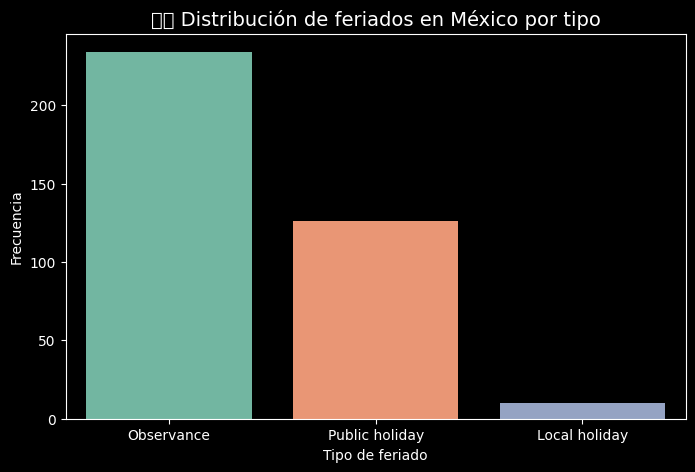

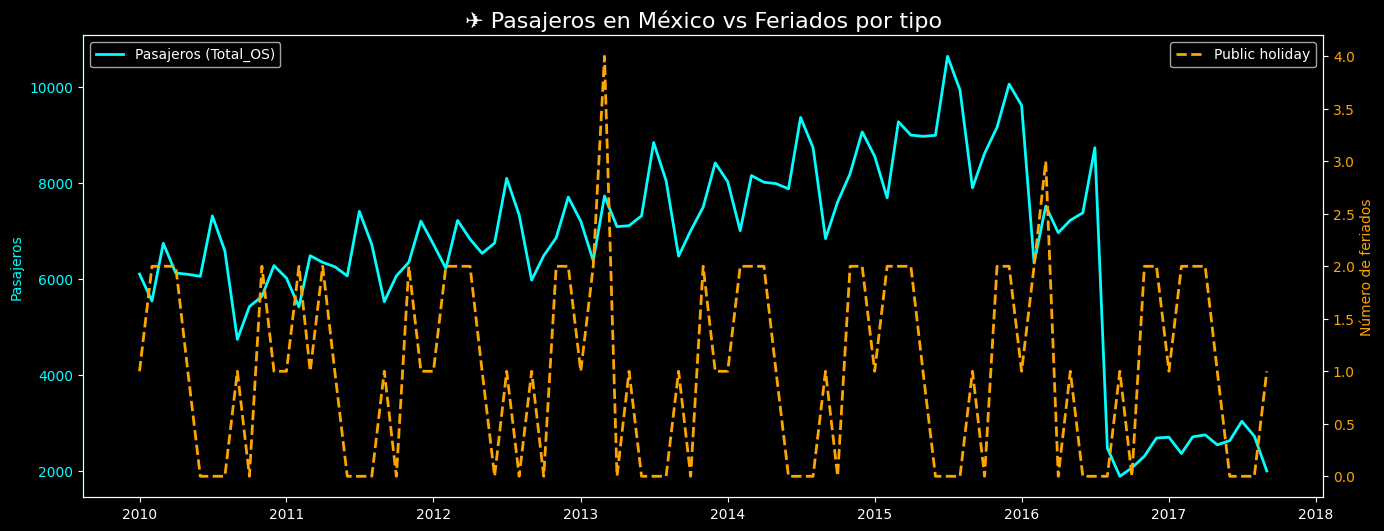

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuración global de estilo oscuro ---
plt.style.use("dark_background")

# --- 2. Conteo de tipos de feriados (gráfico de barras) ---
plt.figure(figsize=(8,5))
sns.countplot(
    data=holidays_mex,
    x="Type",
    order=holidays_mex["Type"].value_counts().index,
    palette="Set2"  # colores que resaltan sobre fondo oscuro
)
plt.title("🇲🇽 Distribución de feriados en México por tipo", color="white", fontsize=14)
plt.xlabel("Tipo de feriado", color="white")
plt.ylabel("Frecuencia", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

# --- 3. Número de feriados por mes y tipo ---
feriados_tipo = holidays_mex.groupby(["Year","Month","Type"]).size().reset_index(name="HolidayCount")

# Pivot para tener columnas por tipo
feriados_pivot = feriados_tipo.pivot_table(
    index=["Year","Month"],
    columns="Type",
    values="HolidayCount",
    fill_value=0
).reset_index()

# --- 4. Unir con df_final ---
df_final_h = df_final.merge(feriados_pivot, on=["Year","Month"], how="left").fillna(0)

# Crear columna fecha de referencia
df_final_h["date"] = pd.to_datetime(df_final_h["Year"].astype(str) + "-" + df_final_h["Month"].astype(str) + "-01")

# --- 5. Gráfico temporal storytelling ---
fig, ax1 = plt.subplots(figsize=(16,6))

# Línea principal: pasajeros
ax1.plot(df_final_h["date"], df_final_h["Total_OS"], color="cyan", linewidth=2, label="Pasajeros (Total_OS)")
ax1.set_ylabel("Pasajeros", color="cyan")
ax1.tick_params(axis="y", labelcolor="cyan")
ax1.tick_params(axis="x", colors="white")
ax1.spines["bottom"].set_color("white")
ax1.spines["top"].set_color("white")
ax1.spines["left"].set_color("cyan")
ax1.spines["right"].set_color("white")

# Segundo eje para feriados
ax2 = ax1.twinx()

# Dibujar líneas por tipo de feriado
colors = {"Public holiday":"orange"}  # contraste con fondo oscuro
for col in ["Public holiday"]:
    if col in df_final_h.columns:
        ax2.plot(
            df_final_h["date"], df_final_h[col],
            label=col, linestyle="--", linewidth=2, color=colors[col]
        )

ax2.set_ylabel("Número de feriados", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Leyendas y título
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("✈️ Pasajeros en México vs Feriados por tipo", color="white", fontsize=16)
plt.show()


/tmp/ipython-input-1017944705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=holidays_mex, x="Type", order=holidays_mex["Type"].value_counts().index, palette="Set2")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127485 (\N{REGIONAL INDICATOR SYMBOL LETTER X}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


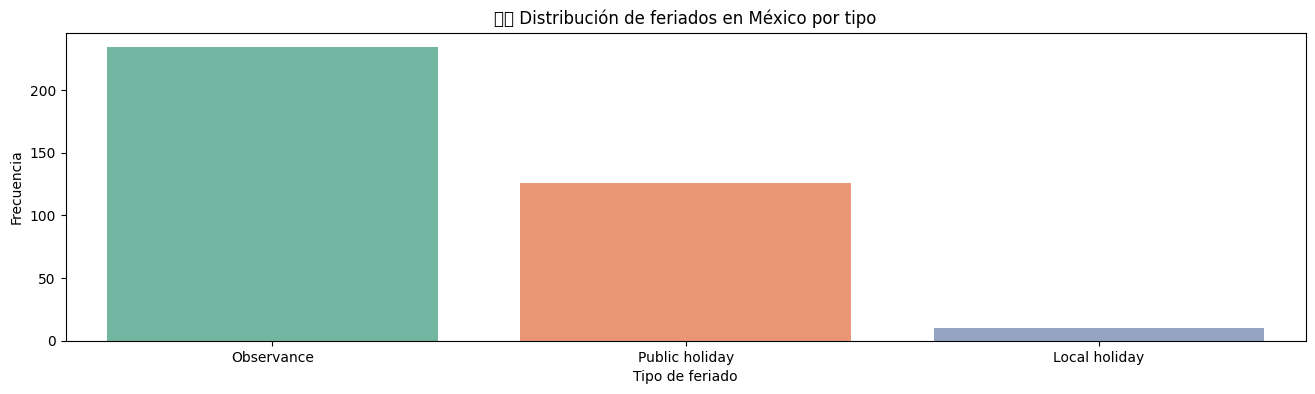

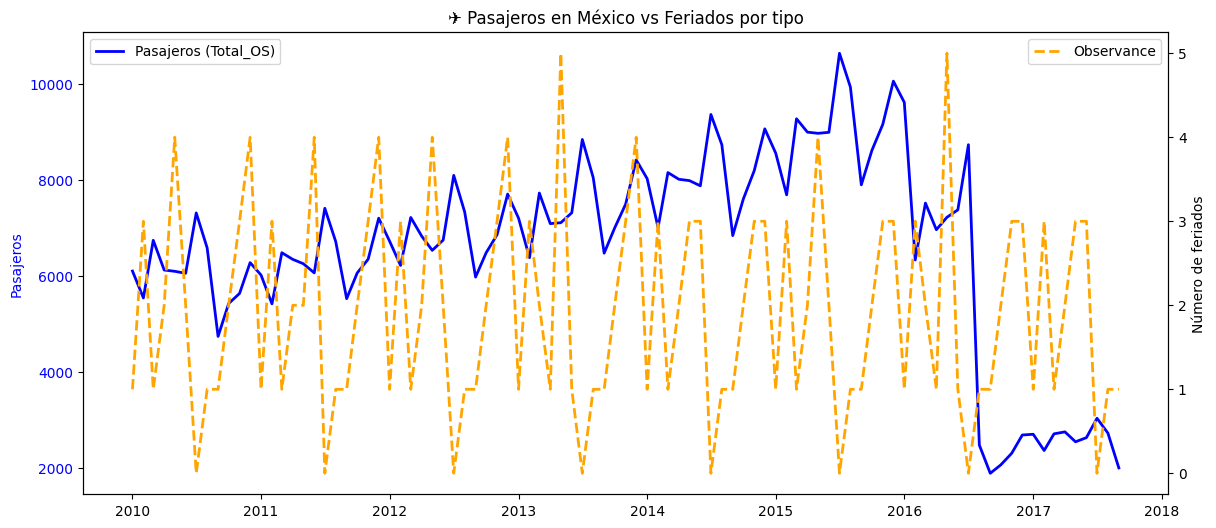

In [162]:


# --- 2. Conteo de tipos de feriados (gráfico de barras) ---
plt.figure(figsize=(16,4))
sns.countplot(data=holidays_mex, x="Type", order=holidays_mex["Type"].value_counts().index, palette="Set2")
plt.title("🇲🇽 Distribución de feriados en México por tipo")
plt.xlabel("Tipo de feriado")
plt.ylabel("Frecuencia")
plt.show()

# --- 3. Número de feriados por mes y tipo ---
feriados_tipo = holidays_mex.groupby(["Year","Month","Type"]).size().reset_index(name="HolidayCount")

# Pivot para tener columnas por tipo
feriados_pivot = feriados_tipo.pivot_table(index=["Year","Month"], columns="Type", values="HolidayCount", fill_value=0).reset_index()

# --- 4. Unir con df_final ---
df_final_h = df_final.merge(feriados_pivot, on=["Year","Month"], how="left").fillna(0)

# Crear columna fecha de referencia
df_final_h["date"] = pd.to_datetime(df_final_h["Year"].astype(str) + "-" + df_final_h["Month"].astype(str) + "-01")

# --- 5. Gráfico temporal storytelling ---
fig, ax1 = plt.subplots(figsize=(14,6))

# Línea principal: pasajeros
ax1.plot(df_final_h["date"], df_final_h["Total_OS"], color="blue", linewidth=2, label="Pasajeros (Total_OS)")
ax1.set_ylabel("Pasajeros", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Segundo eje para feriados
ax2 = ax1.twinx()

# Dibujar líneas por tipo de feriado
colors = {"Observance":"orange"}
for col in ["Observance"]:
    if col in df_final_h.columns:
        ax2.plot(df_final_h["date"], df_final_h[col], label=col, linestyle="--", linewidth=2, color=colors[col])

ax2.set_ylabel("Número de feriados", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Leyendas y título
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("✈️ Pasajeros en México vs Feriados por tipo")
plt.show()


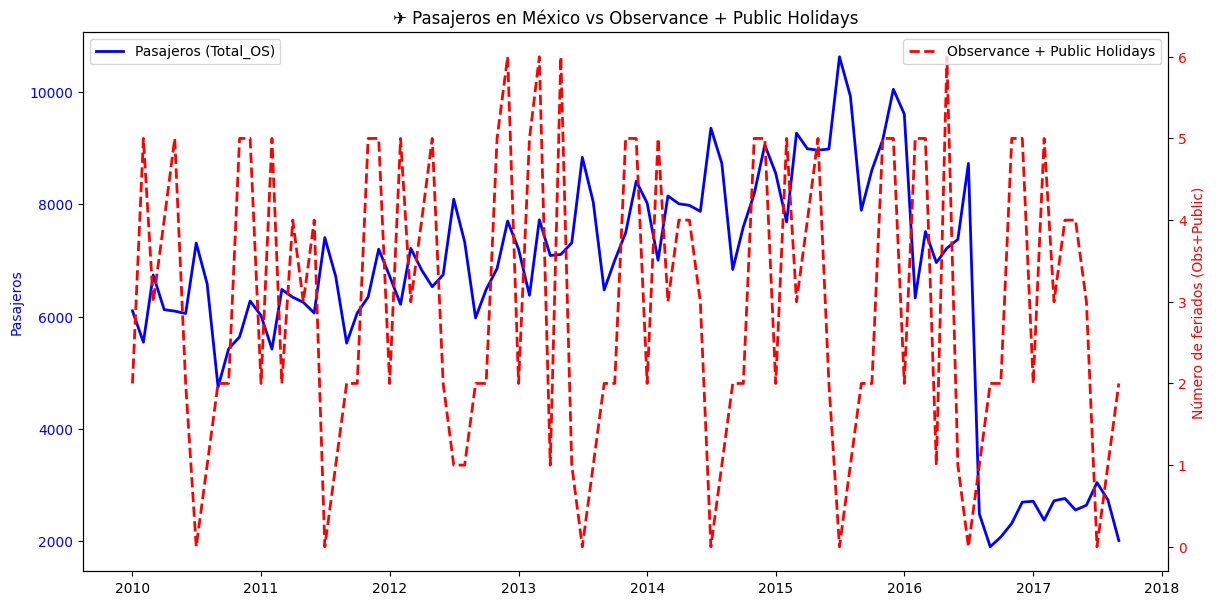

In [163]:
import matplotlib.pyplot as plt

# --- 1. Crear columna con la suma de Observance + Public holidays ---
df_final_h["Obs_Public"] = df_final_h[["Observance","Public holiday"]].sum(axis=1)

# --- 2. Gráfico temporal storytelling ---
fig, ax1 = plt.subplots(figsize=(14,7))

# Línea principal: pasajeros
ax1.plot(df_final_h["date"], df_final_h["Total_OS"],
         color="blue", linewidth=2, label="Pasajeros (Total_OS)")
ax1.set_ylabel("Pasajeros", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Segundo eje para feriados combinados
ax2 = ax1.twinx()
ax2.plot(df_final_h["date"], df_final_h["Obs_Public"],
         label="Observance + Public Holidays", linestyle="--",
         linewidth=2, color="red")

ax2.set_ylabel("Número de feriados (Obs+Public)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Leyendas y título
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("✈️ Pasajeros en México vs Observance + Public Holidays")
plt.show()


Lectura de correlaciones
📈 Relación con Total_OS (pasajeros)

Unemployment (0.36, positivo):
 Contraintuitivo: más desempleo parece coincidir con más pasajeros. Puede ser efecto de variables omitidas (ejemplo: salida de migrantes en crisis) o ruido de datos.

Manufacturing (-0.15, débil negativa):
 Cuando la industria crece, los pasajeros internacionales no necesariamente aumentan. Posible desacople entre turismo y sector productivo.

TradeBalance (0.01, nula):
 La balanza comercial no tiene relación directa con la movilidad de pasajeros.

CPI (-0.52, negativa fuerte):
 La inflación alta reduce la movilidad aérea (viajar se vuelve un lujo → insight poderoso).

ExchangeRate (-0.43, negativa moderada):
 Peso débil frente al dólar coincide con menos pasajeros (viajes al extranjero se encarecen).

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


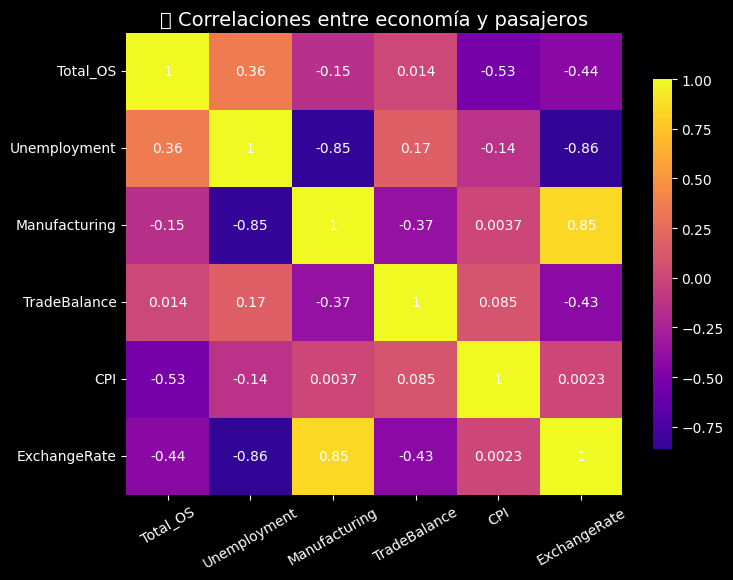

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")

corr_vars = df_final[["Total_OS","Unemployment","Manufacturing","TradeBalance","CPI","ExchangeRate"]]
corr = corr_vars.corr()

plt.figure(figsize=(8,6))

# 🔥 Opciones de paletas (elige la que más te guste):
# cmap = "viridis"     # verde-amarillo-neón
# cmap = "plasma"      # púrpura-rosa-amarillo intenso
# cmap = "magma"       # rojo-naranja
# cmap = "cividis"     # azul-amarillo con buen contraste
# cmap = "Spectral"    # arcoíris
# cmap = "coolwarm"    # clásico, rojo ↔ azul

sns.heatmap(
    corr,
    annot=True,
    cmap="plasma",       # 👈 aquí cambias el color fácilmente
    center=0,
    cbar_kws={"shrink": 0.8},
    annot_kws={"color":"white"}
)

plt.title("🔗 Correlaciones entre economía y pasajeros", color="white", fontsize=14)
plt.xticks(rotation=30, color="white")
plt.yticks(color="white")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


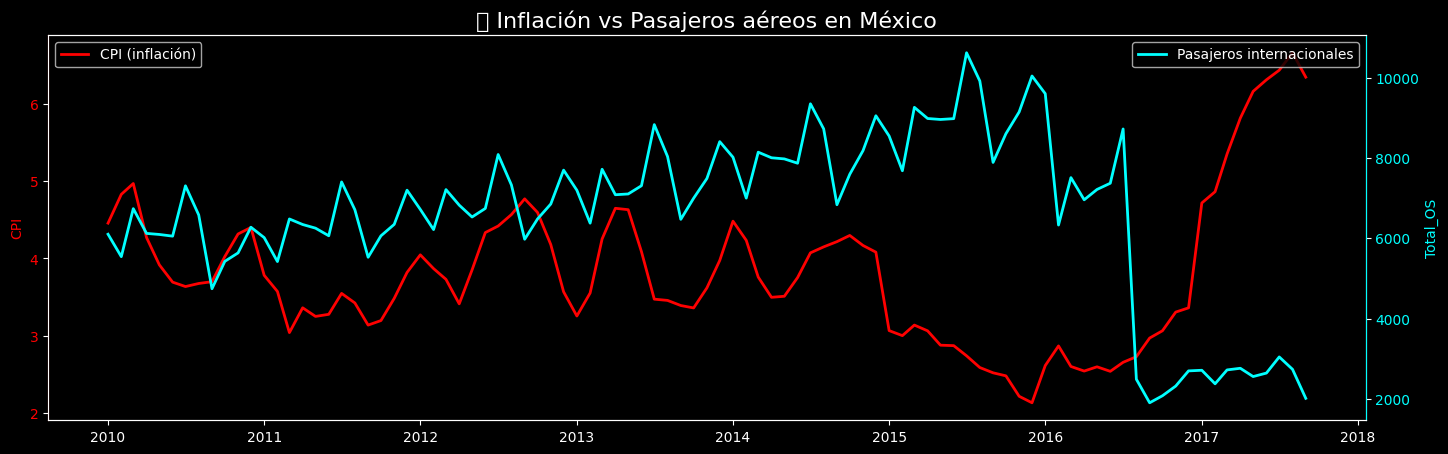

In [174]:
import matplotlib.pyplot as plt

# --- Estilo oscuro ---
plt.style.use("dark_background")

fig, ax1 = plt.subplots(figsize=(17,5))

# --- Eje izquierdo: CPI ---
ax1.plot(df_final["date"], df_final["CPI"], color="red", linewidth=2, label="CPI (inflación)")
ax1.set_ylabel("CPI", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.spines["left"].set_color("red")
ax1.spines["bottom"].set_color("white")
ax1.tick_params(axis="x", colors="white")

# --- Eje derecho: Pasajeros ---
ax2 = ax1.twinx()
ax2.plot(df_final["date"], df_final["Total_OS"], color="cyan", linewidth=2, label="Pasajeros internacionales")
ax2.set_ylabel("Total_OS", color="cyan")
ax2.tick_params(axis="y", labelcolor="cyan")
ax2.spines["right"].set_color("cyan")

# --- Título ---
plt.title("📈 Inflación vs Pasajeros aéreos en México", color="white", fontsize=16)

# --- Leyendas ---
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128177 (\N{CURRENCY EXCHANGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


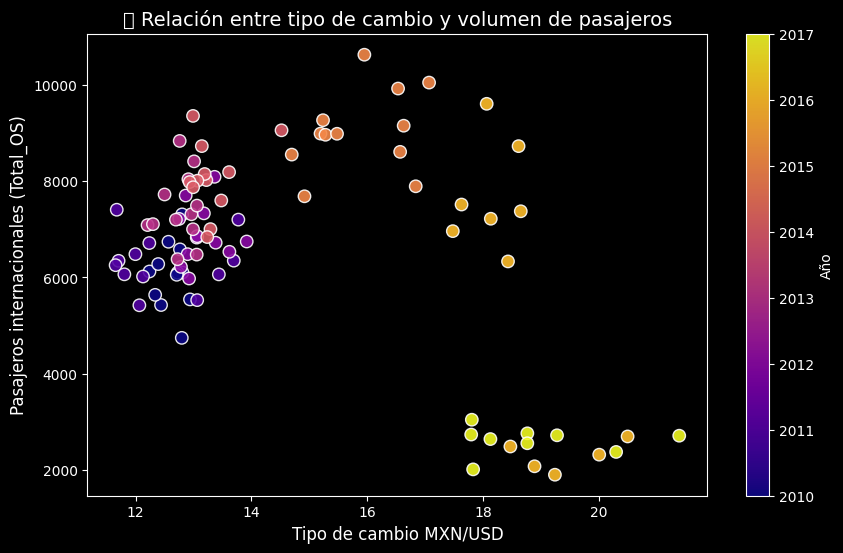

In [175]:
import matplotlib.pyplot as plt

# --- Estilo oscuro ---
plt.style.use("dark_background")

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df_final["ExchangeRate"],
    df_final["Total_OS"],
    c=df_final["Year"],
    cmap="plasma",   # 🔥 degradado púrpura → amarillo
    s=80,
    edgecolor="white",   # borde blanco para resaltar
    alpha=0.9
)

plt.xlabel("Tipo de cambio MXN/USD", color="white", fontsize=12)
plt.ylabel("Pasajeros internacionales (Total_OS)", color="white", fontsize=12)
plt.title("💱 Relación entre tipo de cambio y volumen de pasajeros", color="white", fontsize=14)

# --- Colorbar con estilo ---
cbar = plt.colorbar(scatter)
cbar.set_label("Año", color="white")
cbar.ax.yaxis.set_tick_params(color="white")
plt.setp(cbar.ax.yaxis.get_ticklabels(), color="white")

plt.xticks(color="white")
plt.yticks(color="white")

plt.show()


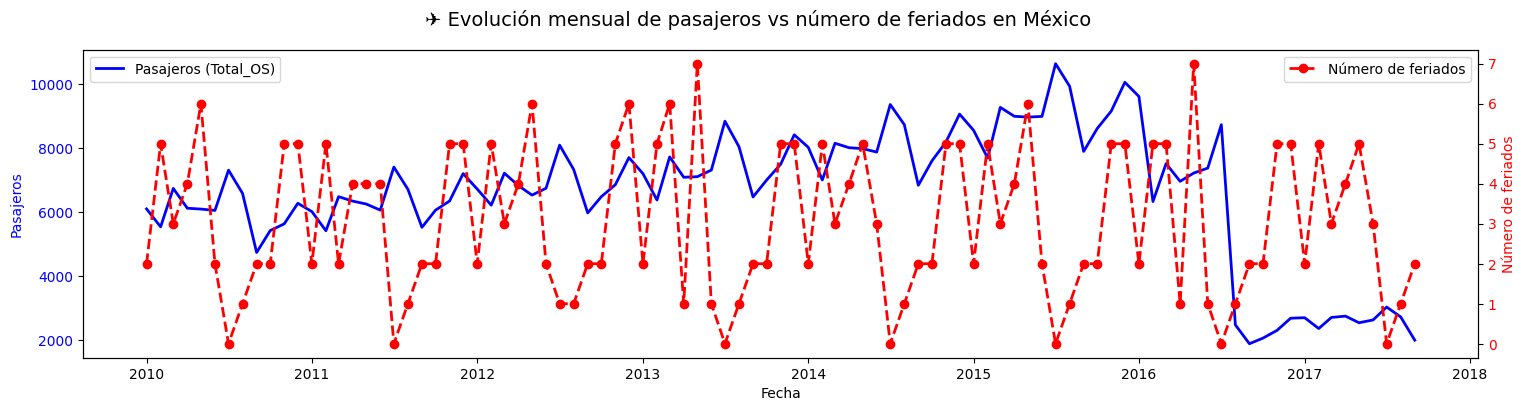

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Preparar holidays para México ---
holidays_mex = holidays[holidays["ISO3"]=="MEX"].copy()
holidays_mex["Date"] = pd.to_datetime(holidays_mex["Date"])
holidays_mex["Year"] = holidays_mex["Date"].dt.year
holidays_mex["Month"] = holidays_mex["Date"].dt.month

# número de feriados por año/mes
feriados_mes = holidays_mex.groupby(["Year","Month"]).size().reset_index(name="HolidayCount")

# --- 2. Unir con df_final ---
df_final_h = df_final.merge(feriados_mes, on=["Year","Month"], how="left").fillna({"HolidayCount":0})

# --- 3. Crear figura ---
fig, ax1 = plt.subplots(figsize=(18,4))

# Línea principal: pasajeros
ax1.plot(df_final_h["date"], df_final_h["Total_OS"], color="blue", linewidth=2, label="Pasajeros (Total_OS)")
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Pasajeros", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# --- 4. Segunda línea: número de feriados (escala derecha) ---
ax2 = ax1.twinx()
ax2.plot(df_final_h["date"], df_final_h["HolidayCount"], color="red", linestyle="--", linewidth=2, marker="o", label="Número de feriados")
ax2.set_ylabel("Número de feriados", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# --- 5. Estética y título ---
fig.suptitle("✈️ Evolución mensual de pasajeros vs número de feriados en México", fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


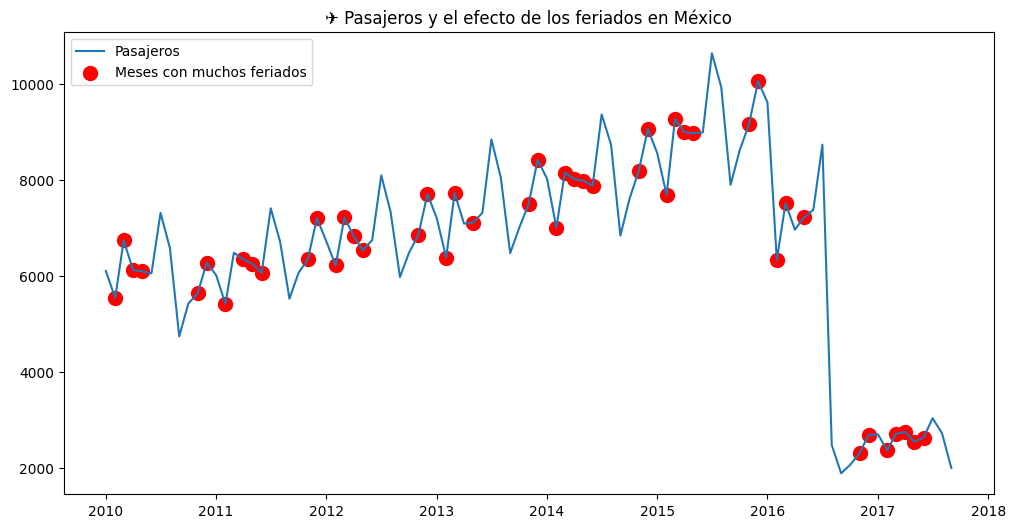

In [138]:
plt.figure(figsize=(12,6))
plt.plot(df_final["date"], df_final["Total_OS"], label="Pasajeros")

# marcar meses con >2 feriados
highlight = df_final_h[df_final_h["HolidayCount"]>2]
plt.scatter(highlight["date"], highlight["Total_OS"], color="red", s=100, label="Meses con muchos feriados")

plt.legend()
plt.title("✈️ Pasajeros y el efecto de los feriados en México")
plt.show()
